# Multi-linear regression analysis with the Pima Diabetes dataset

References: 
* https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d
* https://towardsdatascience.com/linear-regression-model-with-python-481c89f0f05b

In [1]:
%pip install ucimlrepo
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
#from ucimlrepo import fetch_ucirepo
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
import seaborn as sns

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline

### Load dataset

In [4]:
def load_dataset() -> (pd.DataFrame, pd.DataFrame):
    # From diabetes dataset of Scikit-Learn
    X = pd.DataFrame(load_diabetes()["data"],columns=load_diabetes()["feature_names"])
    y = pd.DataFrame(load_diabetes()["target"],columns=["target"])

    X = X.dropna()
    y = y.dropna()

    # The dataset's metadata said that the features are scaled, hence sex has float values
    # Let's convert them back to categorical values
    X.loc[X["sex"]>0, "sex"] = 1
    X.loc[X["sex"]<0, "sex"] = 0
    data = pd.concat([X, y], axis=1)
    # Get categorical labels
    data['diabetes'] = (data['target'] > 180).astype(int)

    return X, y, data

In [5]:
X, y, data = load_dataset()
print(data)

          age  sex       bmi        bp        s1        s2        s3  \
0    0.038076  1.0  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882  0.0 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  1.0  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063  0.0 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383  0.0 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...  ...       ...       ...       ...       ...       ...   
437  0.041708  1.0  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  1.0 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  1.0 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472  0.0  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472  0.0 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  diabetes  
0   -0.002592  0.019907 -0.017646   151.0         0  
1   -0.039493 -0.068332 -0.

Dataset seems to have some values already normalized, like the age.

### Visualize data in the dataset

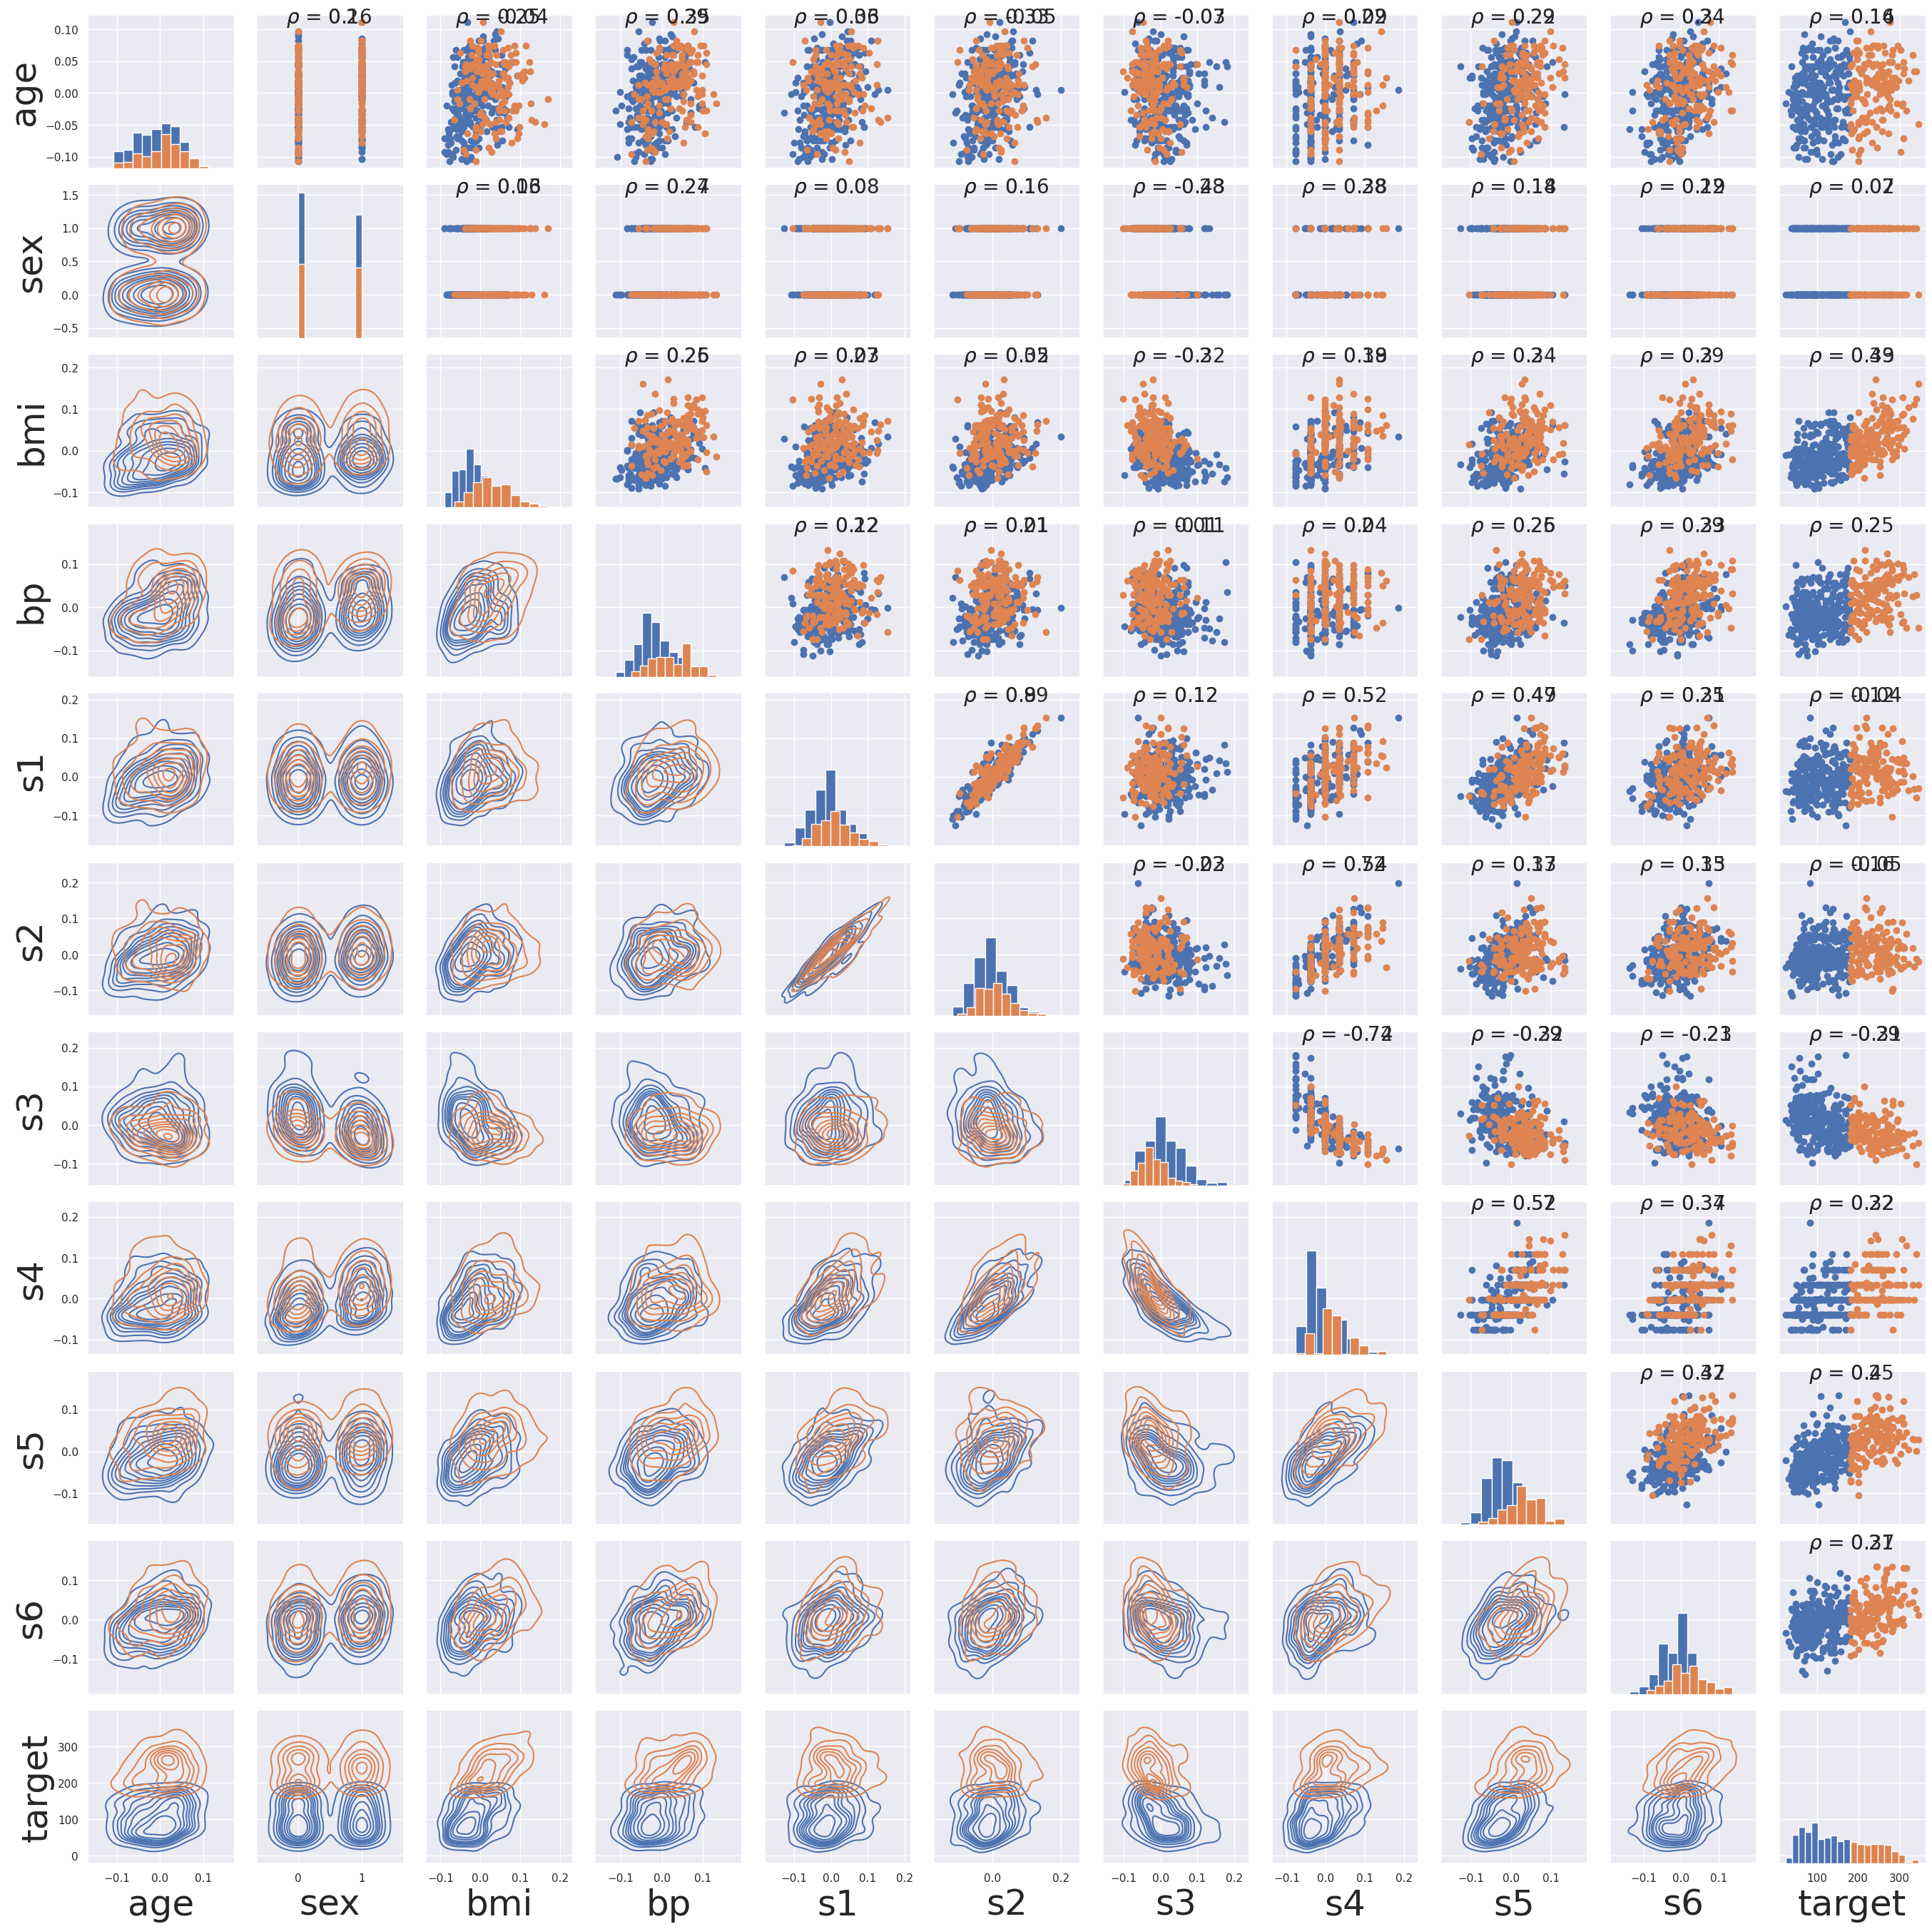

In [11]:
def corr(x, y, **kwargs):
    """
    Calculate pearson correlation coefficient between two variables
    """
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.2, 0.95), size=20, xycoords=ax.transAxes)

sns.set_palette('colorblind')
sns.set(rc={"axes.labelsize": 36})
# Create a pair grid instance
grid = sns.PairGrid(data=data,
                    hue='diabetes'
                    )

# Map the plots to the locations
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot)
grid = grid.map_diag(plt.hist, bins=10)

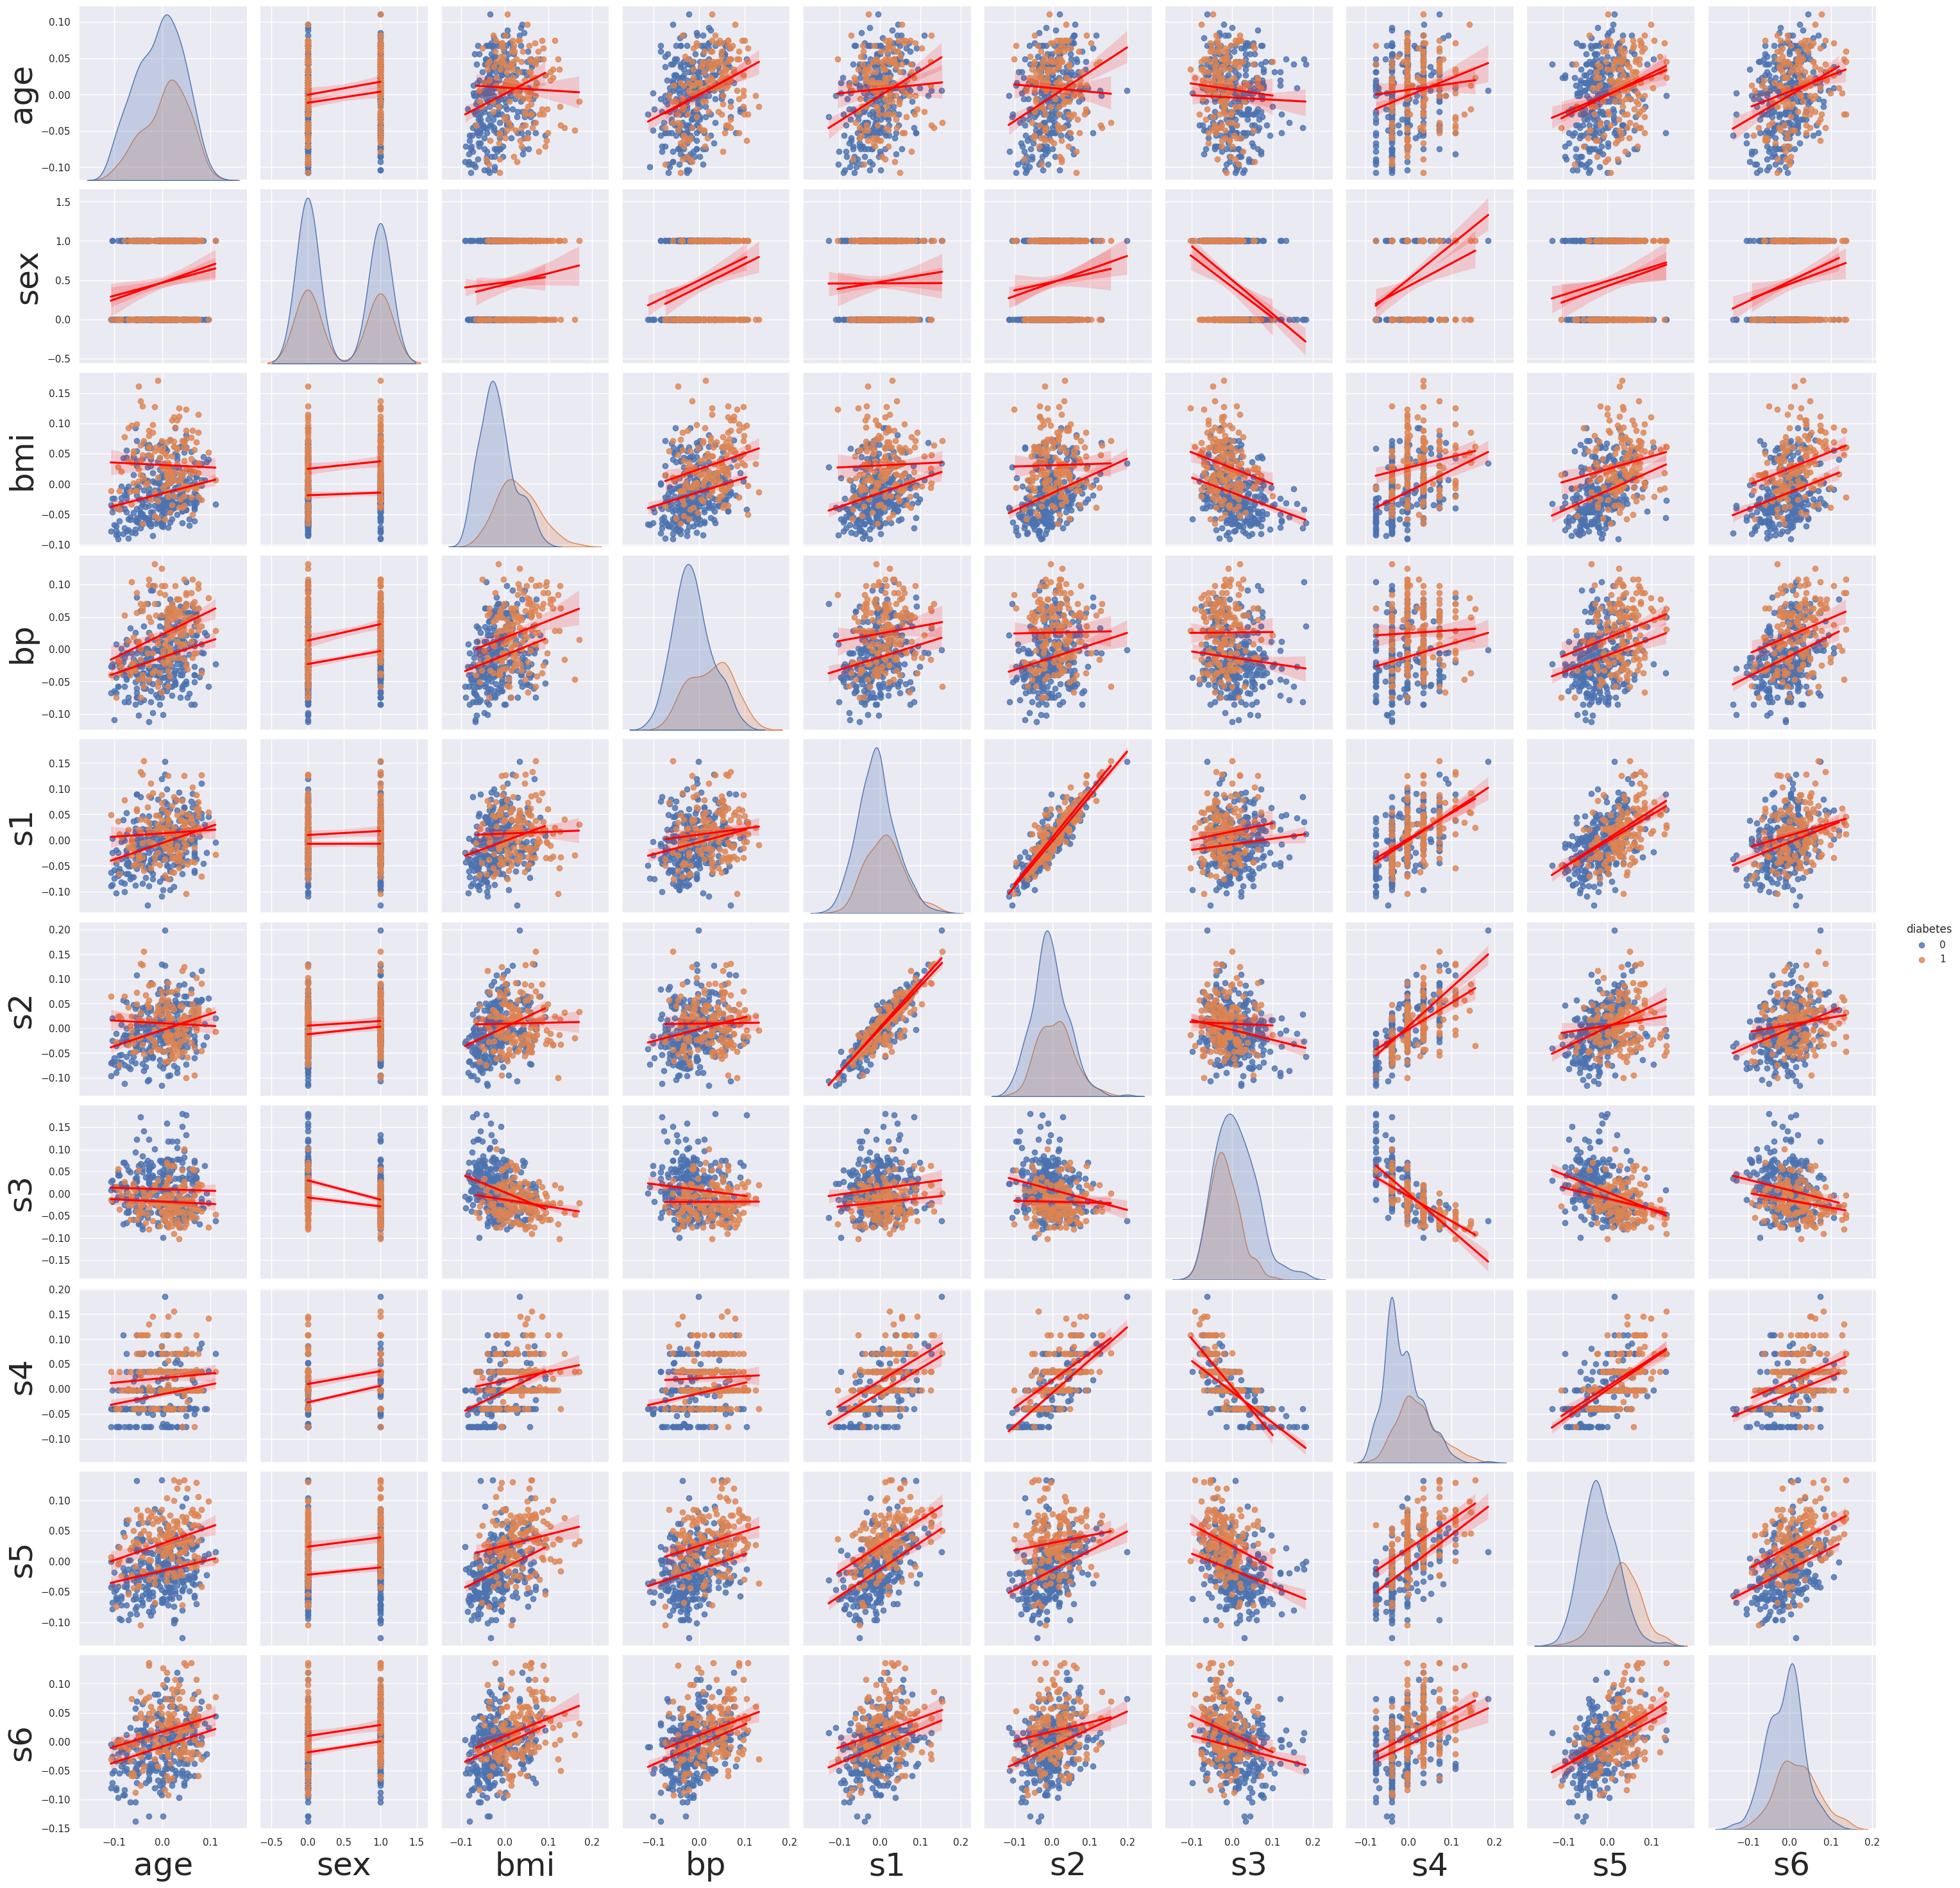

In [7]:
sns.set_palette('colorblind')
sns.set(rc={"axes.labelsize": 36})
sns.pairplot(data=data[X.columns.tolist()+['diabetes']], 
             height=3, 
             hue='diabetes', # Set the color of data points by category
             kind='reg', # Draw regression line in scatter plots
             diag_kind='kde', # Draw kernel density estimate in diagonal plots instead of histogram
             plot_kws={'line_kws':
                       {'color':'red'} # Set the color of the regression line
                       }
             ) 

#### Pairplot interpretation
References: 
* https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166


* s1 and s2 are positively correlated.
* 



### Exploratory Data Analysis (EDA) in regression
References:
* https://medium.com/mlearning-ai/basic-exploratory-data-analysis-template-for-regression-problems-20ca00c58f7d

#### Look at statistical summaries of the features

In [8]:
print(X.describe().T)

     count          mean       std       min       25%       50%       75%  \
age  442.0 -2.511817e-19  0.047619 -0.107226 -0.037299  0.005383  0.038076   
sex  442.0  4.683258e-01  0.499561  0.000000  0.000000  0.000000  1.000000   
bmi  442.0 -2.245564e-16  0.047619 -0.090275 -0.034229 -0.007284  0.031248   
bp   442.0 -4.797570e-17  0.047619 -0.112399 -0.036656 -0.005670  0.035644   
s1   442.0 -1.381499e-17  0.047619 -0.126781 -0.034248 -0.004321  0.028358   
s2   442.0  3.918434e-17  0.047619 -0.115613 -0.030358 -0.003819  0.029844   
s3   442.0 -5.777179e-18  0.047619 -0.102307 -0.035117 -0.006584  0.029312   
s4   442.0 -9.042540e-18  0.047619 -0.076395 -0.039493 -0.002592  0.034309   
s5   442.0  9.293722e-17  0.047619 -0.126097 -0.033246 -0.001947  0.032432   
s6   442.0  1.130318e-17  0.047619 -0.137767 -0.033179 -0.001078  0.027917   

          max  
age  0.110727  
sex  1.000000  
bmi  0.170555  
bp   0.132044  
s1   0.153914  
s2   0.198788  
s3   0.181179  
s4   0.185234

### Split data into training and testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply linear regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [[  37.90402135  -23.06446772  542.42875852  347.70384391 -931.48884588
   518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]]
lr.intercept_: [162.14728965]


In [15]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2900.193628493463
R-squared: 0.4526027629719229


* The closer **MSE** is to 0, the more accurate the model is. However, the MSE values will depend on the model and dataset.
* **R-square** varies from 0 to 1, and in this case it means that the model explains about 45% of the variation in our dependent variable. Generally, the closer to 1, the better.

### Ordinary Least Square (OLS) Stats Model

#### Using statsmodel.api

In [16]:
X_train_ols = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_ols)
results = model.fit()
print(f"results.params: {results.params}")
print(f"results.summary: {results.summary()}")

results.params: const    162.147290
age       37.904021
sex      -23.064468
bmi      542.428759
bp       347.703844
s1      -931.488846
s2       518.062277
s3       163.419983
s4       275.317902
s5       736.198859
s6        48.670657
dtype: float64
results.summary:                             OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           5.41e-50
Time:                        22:45:42   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:     

#### OLS report analysis
This report allows us to determine, for instance, which features are important for a model.

##### r-squared value = 0.528
The closer to 1 the better. However, additional independent features can increase this value, so we should look at the **adjusted r-squared value**.


##### adjusted r-squared value = 0.514
Since this value is not significantly lower than the r-squared, then there shoudn't be a feature significantly penalizing the model.

##### ANOVA Test: F-statistics = 38.25 and Prob (F-statistic) or p-value = 5.41e-50 (f-test)
The null hypothesis is that the model considering the intersection of features and the model considering multi features are equal, and the alternative hypothesis is that the intercept only model is worse than our model.
With the null hypothesis, we can accept or reject by comparing these two values. Given that **Prob (F-statistic) or p-value** is close to 0 and **F-statistics** is large, we can reject the null hypothesis, so there is a linear relation between the features.

##### (t-test)
The null hypothesis of a particular feature is that the feature is going to be equal to 0. The alternate hypothesis is that the feature will not be 0.
To perform the t-test, for each feature, look at columns t and P>|t|. The higer the t value, the greater the chances that I will reject the hypothesis. If the P>|t| value is > 0.05, we fail to reject the null hypothesis.

In our case, this means that features **age, s3 and s6** are irrelevant to our linear regression model, thus can be dropped.
* For instance, for **age**: P>|t| > 0.05, so the feature is not important.

The features **bmi, bp and s5** are relevant to our linear regression model.
* For instance, for **bmi**: P>|t| < 0.05, so we don't reject the null hypothesis, and it has a high t value.

### Keep only the important features

In [28]:
chosen_features = ['bmi', 'bp', 's5']

In [29]:
X_train_important_feats = X_train[chosen_features]

lr_important_feats = LinearRegression()
lr_important_feats.fit(X_train_important_feats, y_train)
print(f"lr.coef_: {lr_important_feats.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [[650.63138341 283.8989004  491.98271159]]
lr.intercept_: [162.14728965]


In [70]:
X_test_important_feats = X_test[chosen_features]

y_pred_important_feats = lr_important_feats.predict(X_test_important_feats)
mse = mean_squared_error(y_test, y_pred_important_feats)
r2 = r2_score(y_test, y_pred_important_feats)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2891.037211291966
R-squared: 0.45433099153843404


The results did not change much

**Coefficient of determination or R2 score** is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).

### Feature importance using Permutation feature ranking (rfpimp)

In [ ]:
%pip install rfpimp

Note: you may need to restart the kernel to use updated packages.


In [19]:
import rfpimp
from sklearn.ensemble import RandomForestRegressor

In [24]:
def plot_permutation_feat_imp(feat_imp):
    fig, ax = plt.subplots(figsize=(6, 3))

    ax.barh(feat_imp.index, feat_imp['Importance'], height=0.8)
    ax.set_xlabel('Importance score', fontsize=14)
    ax.set_title('Permutation feature importance', fontsize=20)
    plt.gca().invert_yaxis()

    fig.tight_layout()
    plt.show()

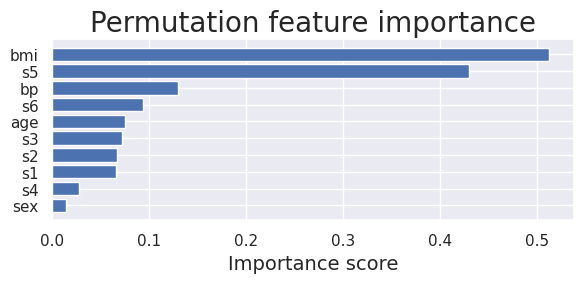

In [25]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)
feat_imp = rfpimp.importances(rf, X_train, y_train)
plot_permutation_feat_imp(feat_imp)

Importance scores from OLS analysis matches the feature importance returned by the RandomForestRegressor.

### Plot multiple linear features

In [61]:
def plot_3d(x_train, y_train):
    features = x_train.columns[ : 2]
    X = x_train[features].values.reshape(-1, 2)

    x = X[:, 0]
    y = X[:, 1]
    z = y_train['target']

    max_values = x_train.max()
    min_values = x_train.min()

    n_samples = 40
    xx_pred = np.linspace(min_values[features[0]], max_values[features[0]], num=n_samples)  # range of bmi values
    yy_pred = np.linspace(min_values[features[1]], max_values[features[1]], num=n_samples)  # range of bp values
    xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)

    model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
    model = LinearRegression().fit(X, y_train)
    predicted = model.predict(model_viz)
    r2 = model.score(X, y_train)
    
    plt.style.use('default')

    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    axes = [ax1, ax2, ax3]
    axis_labels_fontsize = 12
    for ax in axes:
        ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
        ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
        ax.set_xlabel(features[0], fontsize=axis_labels_fontsize)
        ax.set_ylabel(features[1], fontsize=axis_labels_fontsize)
        ax.set_zlabel('Target', fontsize=axis_labels_fontsize)
        ax.locator_params(nbins=4, axis='x')
        ax.locator_params(nbins=5, axis='x')

    ax1.view_init(elev=27, azim=112)
    ax2.view_init(elev=16, azim=-51)
    ax3.view_init(elev=60, azim=165)
    fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

    fig.tight_layout()
    plt.show()

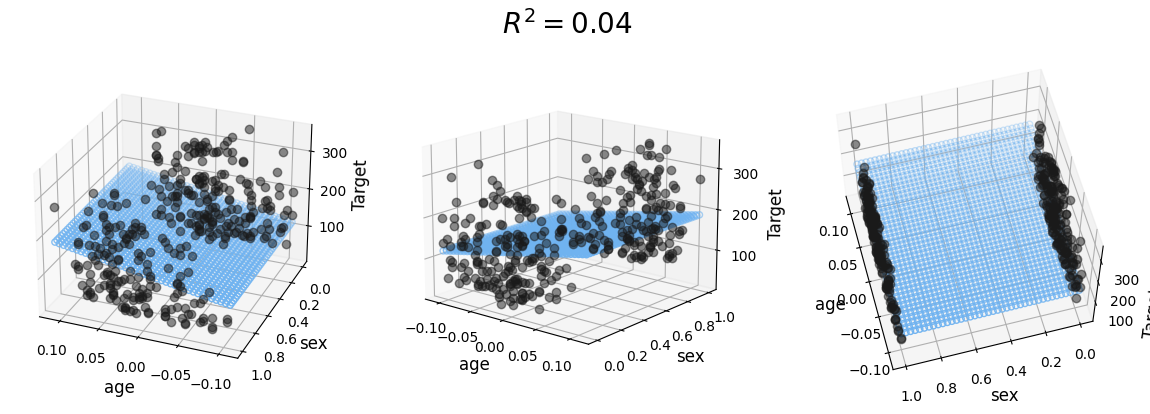

In [62]:
plot_3d(X_train, y_train)

### Residual Analysis

#### Linearity

In [72]:
data_important_feats = X_test_important_feats.copy(deep=True)
data_important_feats['target'] = y_test
data_important_feats['pred'] = lr_important_feats.predict(X_test_important_feats)
data_important_feats['residual'] = data_important_feats['target'] - data_important_feats['pred']
data_important_feats.head()

bmi        bp        s5  target        pred    residual
287 -0.006206 -0.015999  0.032432   219.0  159.050426   59.949574
211  0.036907  0.021872 -0.022517    70.0  170.818512 -100.818512
72  -0.004050 -0.012556  0.084492   202.0  187.042594   14.957406
321  0.051996  0.079265  0.098648   230.0  256.540631  -26.540631
73  -0.020218 -0.002228 -0.005142   111.0  135.357742  -24.357742

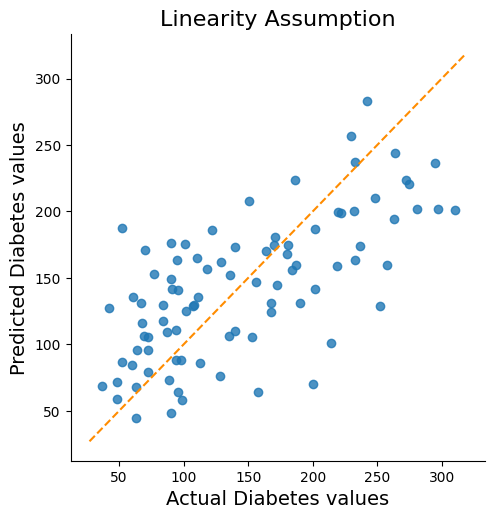

In [75]:
sns.lmplot(x='target', y='pred', data=data_important_feats, fit_reg=False)
    
# Plotting the diagonal line
features_to_plot = ['target', 'pred']
line_coords = np.arange(data_important_feats[features_to_plot].min().min()-10, 
                        data_important_feats[features_to_plot].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

axis_labels_fontsize = 14
plt.ylabel('Predicted Diabetes values', fontsize=axis_labels_fontsize)
plt.xlabel('Actual Diabetes values', fontsize=axis_labels_fontsize)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The plot shows residual points evenly distributed around the line, so we can assume that there us a linear relationship between our independent and dependent variables.

#### Normality

In [163]:
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.graphics.gofplots import qqplot

In [164]:
def quantile_quantile_plot(df):
    fig = qqplot(df['residual'], line='45', fit='True')
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Sample quantiles")
    plt.show()

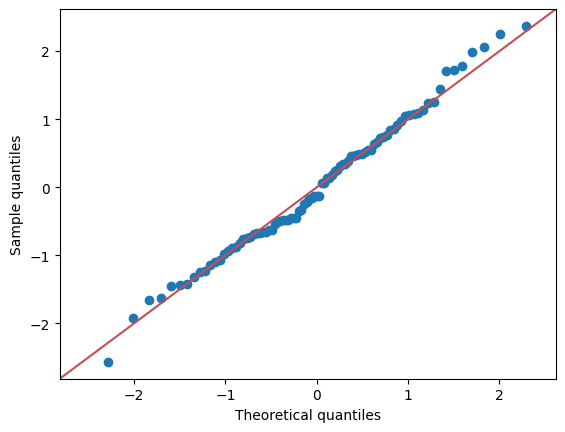

In [165]:
quantile_quantile_plot(data_important_feats)

The data distribution follows the line from the bottom to the top, showing that the data follows approximately a normal distribution.

Another alternative is:

**Anderson-Darling test:** Assumes the error terms of the model are normally distributed and tests the Null-hypothesis for normality.

In [79]:
def anderson_darling_test_residuals_histogram(df):
    p_value = normal_ad(df['residual'])[1]
    print(f'Anderson-Darling test p-value: {p_value}')

    # Plotting the residuals distribution
    plt.subplots(figsize=(8, 4))
    plt.title('Distribution of Residuals', fontsize=18)
    sns.distplot(df['residual'])
    plt.show()

    # Reporting the normality of the residuals
    if p_value < 0.05:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

Anderson-Darling test p-value: 0.477549511004453


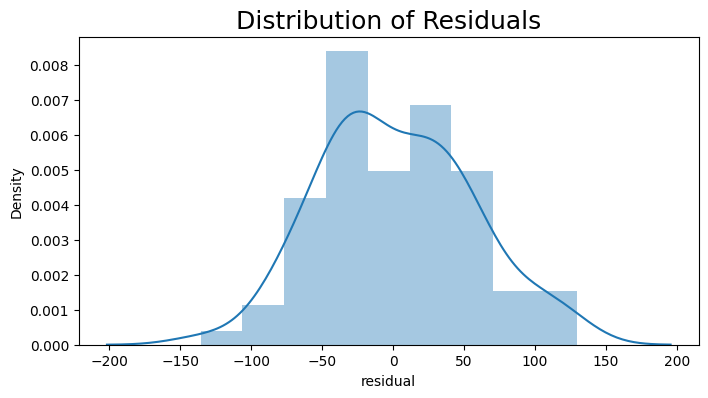

Residuals are normally distributed


In [80]:
anderson_darling_test_residuals_histogram(data_important_feats)

Also, from the figure, we can see a line close to a normal distribution.

#### Multicollinearity

**Pearson correlation coefficient test:**

In [89]:
def pearson_correlation_coefficient_test_heatmap(df):
    corr = df[df.columns[ : -2]].corr() # Disregard the last two columns: pred and residual
    print('Pearson correlation coefficient matrix of each variables:\n', corr)

    # Generate a mask for the diagonal cell
    mask = np.zeros_like(corr, dtype=bool)
    np.fill_diagonal(mask, val=True)

    fig, ax = plt.subplots(figsize=(4, 3))

    cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
    cmap.set_bad('grey')

    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
    fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

Pearson correlation coefficient matrix of each variables:
              bmi        bp        s5    target
bmi     1.000000  0.391648  0.348073  0.507597
bp      0.391648  1.000000  0.467856  0.419776
s5      0.348073  0.467856  1.000000  0.621286
target  0.507597  0.419776  0.621286  1.000000


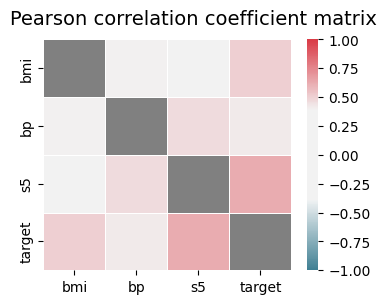

In [90]:
pearson_correlation_coefficient_test_heatmap(data_important_feats)

* There is a **positive** relationship between **target and bmi**, **s5 and bp**, and **s5 and target**.
* There are no negative relationships.
* There is almost **0 correlation** between **bmi and s5**, and **bp and target**.
* This means that two of our independent variables, bmi and s5, are not affecting each other, but **s5 and bp are, so there is multicollinearity in our data**.

#### Autocorrelation

**Durbin-Watson test:** Correlation of residuals over time. Autocorrelation happens when residuals in one time period are related to residuals in another time period. 
* score < 1.5 -> Positive autocorrelation.
* 1.5 < score < 2.5 -> No autocorrelation.
* score > 2.5 -> Negative autocorrelation.

In [91]:
from statsmodels.stats.stattools import durbin_watson

In [92]:
def durbin_watson_test(df):
    durbin_watson_score = durbin_watson(df['residual'])

    print('Durbin-Watson:', durbin_watson_score)
    if durbin_watson_score < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbin_watson_score > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [93]:
durbin_watson_test(data_important_feats)

Durbin-Watson: 2.1034565827646343
Little to no autocorrelation 

Assumption satisfied


#### Homoscedascity

* **Homoscedasticity:** There is variance across the error terms.
* **Heteroscedasticity:** There is no variance across the error terms.

In [158]:
def homoscedascity_plot(df):
    fig, ax = plt.subplots(figsize=(8, 4))
    #plt.scatter(x=df.index, y=df.residual, alpha=0.8)
    #plt.plot(np.repeat(0, max(df.index)+10), color='darkorange', linestyle='--')
    sns.regplot(x='pred', y='residual', data=df, scatter_kws={'alpha': 0.25}, line_kws={'color': 'orange', 'lw': 2}, ax=ax)

    label_fontsize = 14
    plt.ylabel('Residual', fontsize=label_fontsize)
    plt.xlabel('Predicted', fontsize=label_fontsize)
    plt.title('Homoscedasticity Assumption', fontsize=label_fontsize+2)
    plt.show()  

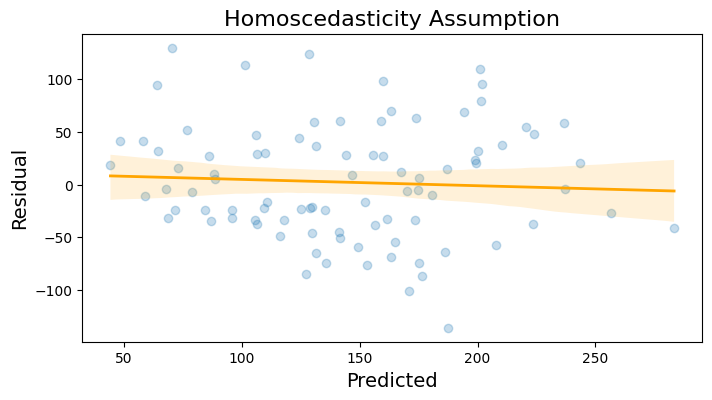

In [159]:
homoscedascity_plot(data_important_feats)

There is a uniform distribution on the residuals, which indicates that ther is no heteroscedasticity.

### Final Results

Decided to remove **bp** since there is **multicollinearity**.

In [140]:
def linear_regression_preds_vs_actual_plot(y, y_pred):
    df_results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

    d_line= np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(d_line, d_line, color='orange', linestyle='--')
    plt.show()

Mean Squared Error: 2901.8369415567036
R-squared: 0.4522925957397932


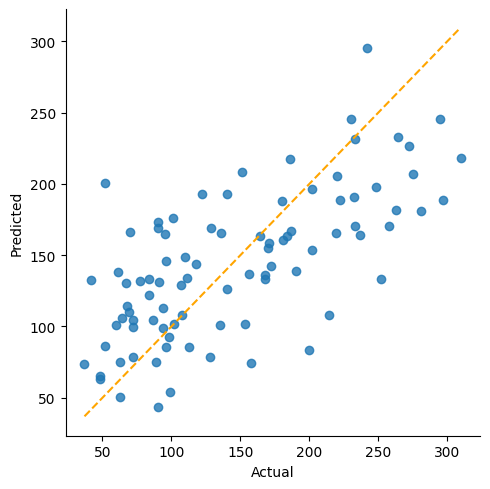

In [141]:
chosen_features_final = ['bmi',  's5']
X_train_final_feats = X_train[chosen_features_final]

lr_final_feats = LinearRegression()
lr_final_feats.fit(X_train_final_feats, y_train)

X_test_final_feats = X_test[chosen_features_final]

y_pred_final_feats = lr_final_feats.predict(X_test_final_feats)
mse = mean_squared_error(y_test, y_pred_final_feats)
r2 = r2_score(y_test, y_pred_final_feats)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

linear_regression_preds_vs_actual_plot(y_test['target'],  y_pred_final_feats.flatten())